In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


# **Data Collection: Load and Inspect**

In [26]:
# Step 1: Data Collection - Load and inspect the dataset
try:
    # Load the CSV file into a pandas DataFrame
    file_path = '/content/Electric Vehicle Sales by State in India.csv'
    df = pd.read_csv(file_path)

    print("Dataset loaded successfully!")

    # Display the first 5 rows to get a quick look at the data
    print("\nFirst 5 Rows of the Dataset:")
    print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

    # Display information about the DataFrame, including column data types and non-null values
    print("\nDataFrame Information:")
    df.info()

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure the CSV file is in the same directory as your Python script.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully!

First 5 Rows of the Dataset:
| Year   | Month_Name   | Date     | State          | Vehicle_Class        | Vehicle_Category   | Vehicle_Type   | EV_Sales_Quantity   |
|:-------|:-------------|:---------|:---------------|:---------------------|:-------------------|:---------------|:--------------------|
| 2014   | jan          | 1/1/2014 | Andhra Pradesh | ADAPTED VEHICLE      | Others             | Others         | 0                   |
| 2014   | jan          | 1/1/2014 | Andhra Pradesh | AGRICULTURAL TRACTOR | Others             | Others         | 0                   |
| 2014   | jan          | 1/1/2014 | Andhra Pradesh | AMBULANCE            | Others             | Others         | 0                   |
| 2014   | jan          | 1/1/2014 | Andhra Pradesh | ARTICULATED VEHICLE  | Others             | Others         | 0                   |
| 2014   | jan          | 1/1/2014 | Andhra Pradesh | BUS                  | Bus                | Bus            | 0   

# **Data Preprocessing and Feature Engineering**

In [27]:
# Step 2: Data Preprocessing and Feature Engineering
try:
    # Load the dataset
    file_path = 'Electric Vehicle Sales by State in India.csv'
    df = pd.read_csv(file_path)

    # Convert the 'Date' column from string to datetime objects
    df['Date'] = pd.to_datetime(df['Date'])

    # Perform feature engineering by extracting 'Year' and 'Month'
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month

    # Clean up column names by replacing spaces with underscores
    df.columns = df.columns.str.replace(' ', '_')

    print("Data preprocessing and feature engineering completed successfully.")
    print("\nDataFrame after preprocessing:")
    print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure the CSV file is in the same directory as your Python script.")
except Exception as e:
    print(f"An error occurred: {e}")

Data preprocessing and feature engineering completed successfully.

DataFrame after preprocessing:
| Year   | Month_Name   | Date                | State          | Vehicle_Class        | Vehicle_Category   | Vehicle_Type   | EV_Sales_Quantity   | Month   |
|:-------|:-------------|:--------------------|:---------------|:---------------------|:-------------------|:---------------|:--------------------|:--------|
| 2014   | jan          | 2014-01-01 00:00:00 | Andhra Pradesh | ADAPTED VEHICLE      | Others             | Others         | 0                   | 1       |
| 2014   | jan          | 2014-01-01 00:00:00 | Andhra Pradesh | AGRICULTURAL TRACTOR | Others             | Others         | 0                   | 1       |
| 2014   | jan          | 2014-01-01 00:00:00 | Andhra Pradesh | AMBULANCE            | Others             | Others         | 0                   | 1       |
| 2014   | jan          | 2014-01-01 00:00:00 | Andhra Pradesh | ARTICULATED VEHICLE  | Others             | Ot

# **Exploratory Data Analysis (EDA)**


--- Step 3: Exploratory Data Analysis (EDA) & Visualization ---


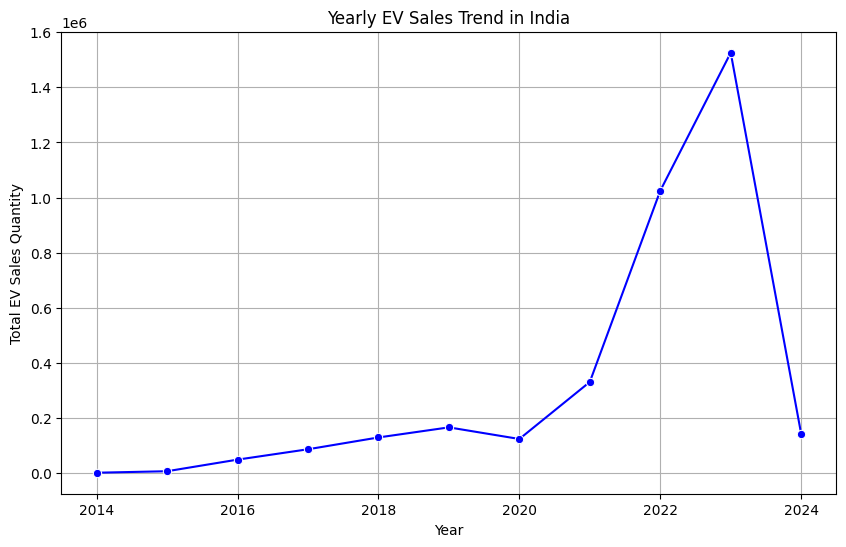

/tmp/ipython-input-2922596061.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Sales', y='State', data=state_sales, palette='viridis')


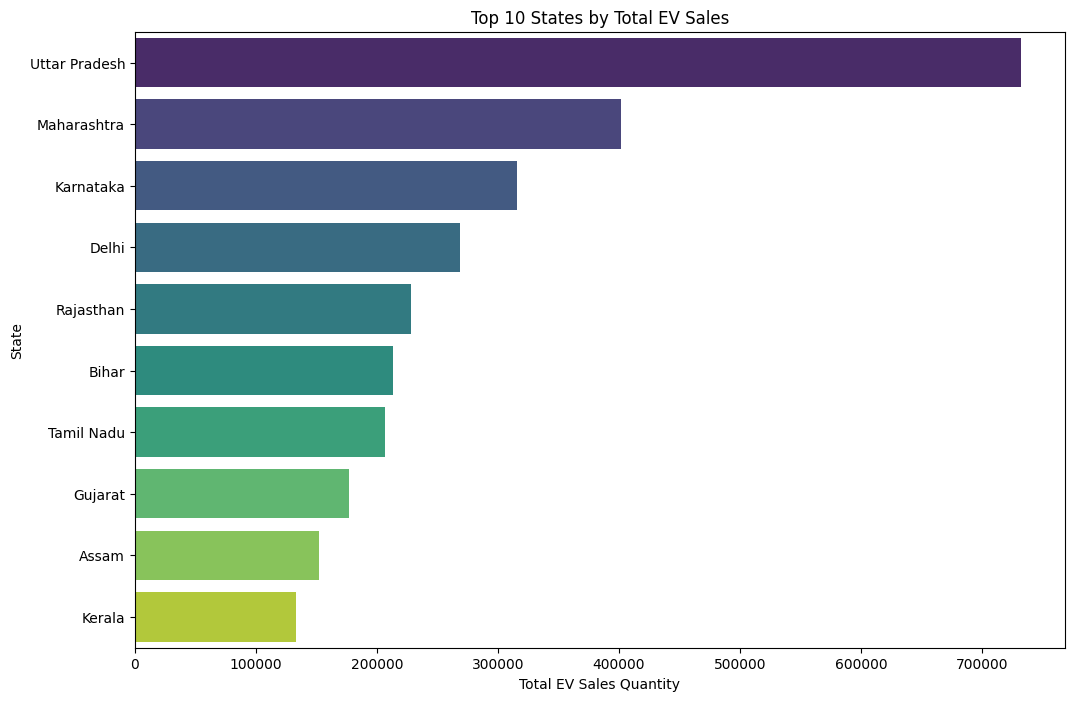


Exploratory Data Analysis visualizations completed.


In [28]:
# --- Step 3: Exploratory Data Analysis (EDA) ---
print("\n--- Step 3: Exploratory Data Analysis (EDA) & Visualization ---")

# 1. Analyze and visualize yearly sales trends
# Aggregate total sales per year
yearly_sales = df.groupby('Year').agg(
    Total_Sales=('EV_Sales_Quantity', 'sum')
).reset_index()

# Plot the yearly sales trend using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total_Sales', data=yearly_sales, marker='o', color='b')
plt.title('Yearly EV Sales Trend in India')
plt.xlabel('Year')
plt.ylabel('Total EV Sales Quantity')
plt.grid(True)
plt.show()

# 2. Analyze and visualize state-wise sales
# Aggregate total sales by state and get the top 10
state_sales = df.groupby('State').agg(
    Total_Sales=('EV_Sales_Quantity', 'sum')
).sort_values('Total_Sales', ascending=False).head(10).reset_index()

# Plot the top 10 states by sales using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Sales', y='State', data=state_sales, palette='viridis')
plt.title('Top 10 States by Total EV Sales')
plt.xlabel('Total EV Sales Quantity')
plt.ylabel('State')
plt.show()

print("\nExploratory Data Analysis visualizations completed.")

# **Feature Engineering**

In [29]:
# --- Step 4: Feature Engineering ---
print("\n--- Step 4: Feature Engineering ---")

# Aggregate the data by relevant features for a clean modeling dataset
df_model = df.groupby(['Year', 'Month_Name', 'State', 'Vehicle_Category', 'Vehicle_Type']).agg(
    EV_Sales_Quantity=('EV_Sales_Quantity', 'sum')
).reset_index()

# Drop rows with zero sales to focus the model on positive trends
df_model = df_model[df_model['EV_Sales_Quantity'] > 0].reset_index(drop=True)

# Define features (X) for the model
X = df_model[['Year', 'Month_Name', 'State', 'Vehicle_Category', 'Vehicle_Type']]

# Identify categorical features to be encoded
categorical_features = ['State', 'Vehicle_Category', 'Vehicle_Type']

# Use One-Hot Encoding to convert the categorical features into numerical columns
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features])

# Convert the encoded features into a DataFrame with meaningful column names
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_features))

# Combine the numerical features ('Year') and the encoded categorical features
X_final = pd.concat([X[['Year', 'Month_Name']].reset_index(drop=True), X_encoded_df], axis=1)

print("Features engineered and data is ready for modeling.")
print("\nFinal features DataFrame head:")
print(X_final.head().to_markdown(index=False, numalign="left", stralign="left"))


--- Step 4: Feature Engineering ---
Features engineered and data is ready for modeling.

Final features DataFrame head:
| Year   | Month_Name   | State_Andaman & Nicobar Island   | State_Andhra Pradesh   | State_Arunachal Pradesh   | State_Assam   | State_Bihar   | State_Chandigarh   | State_Chhattisgarh   | State_DNH and DD   | State_Delhi   | State_Goa   | State_Gujarat   | State_Haryana   | State_Himachal Pradesh   | State_Jammu and Kashmir   | State_Jharkhand   | State_Karnataka   | State_Kerala   | State_Ladakh   | State_Madhya Pradesh   | State_Maharashtra   | State_Manipur   | State_Meghalaya   | State_Mizoram   | State_Nagaland   | State_Odisha   | State_Puducherry   | State_Punjab   | State_Rajasthan   | State_Sikkim   | State_Tamil Nadu   | State_Tripura   | State_Uttar Pradesh   | State_Uttarakhand   | State_West Bengal   | Vehicle_Category_2-Wheelers   | Vehicle_Category_3-Wheelers   | Vehicle_Category_4-Wheelers   | Vehicle_Category_Bus   | Vehicle_Category_Others   | Veh

# **Modeling**

In [30]:
# --- Step 5: Modeling: Build a Regression Model ---
print("\n--- Step 5: Building a Regression Model (Linear Regression) ---")

# Define features (X) and target (y)
X = df_model[['Year', 'Month_Name', 'State', 'Vehicle_Category', 'Vehicle_Type']]
y = df_model['EV_Sales_Quantity']

# Identify categorical features to be encoded, including 'Month_Name'
categorical_features = ['State', 'Vehicle_Category', 'Vehicle_Type', 'Month_Name']

# Use One-Hot Encoding to convert the categorical features into numerical columns
# Using pandas get_dummies for simplicity and direct DataFrame output
X_final = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# 1. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

print(f"Data split: Training samples ({len(X_train)}), Testing samples ({len(X_test)})")

# 2. Initialize the Linear Regression model
model = LinearRegression()

# 3. Train the model using the training data
model.fit(X_train, y_train)

print("\nModeling successfully completed!")
print("The Linear Regression model has been trained on the data.")
print("The trained model is ready for Step 6 (Evaluation).")


--- Step 5: Building a Regression Model (Linear Regression) ---
Data split: Training samples (9602), Testing samples (2401)

Modeling successfully completed!
The Linear Regression model has been trained on the data.
The trained model is ready for Step 6 (Evaluation).


# **Evaluation**

In [31]:
# --- Step 6: Evaluation: Evaluate the model performance and interpret the results. ---
print("\n--- Step 6: Evaluation: Evaluate the model performance and interpret the results. ---")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Interpretation of Results
print("\n### Interpretation of Results ###")
print(f"The **Mean Squared Error (MSE)** of {mse:.2f} measures the average squared difference between the actual and predicted sales.")
print(f"The **Root Mean Squared Error (RMSE)** of {rmse:.2f} is in the same units as sales quantity, providing a more interpretable measure of the average prediction error.")
print(f"The **R-squared (R2) Score** of {r2:.2f} indicates the proportion of the variance in EV sales that is predictable from the features. An R2 score of 1.0 would mean a perfect prediction.")


--- Step 6: Evaluation: Evaluate the model performance and interpret the results. ---
Mean Squared Error (MSE): 1082013.11
Root Mean Squared Error (RMSE): 1040.20
R-squared (R2) Score: 0.17

### Interpretation of Results ###
The **Mean Squared Error (MSE)** of 1082013.11 measures the average squared difference between the actual and predicted sales.
The **Root Mean Squared Error (RMSE)** of 1040.20 is in the same units as sales quantity, providing a more interpretable measure of the average prediction error.
The **R-squared (R2) Score** of 0.17 indicates the proportion of the variance in EV sales that is predictable from the features. An R2 score of 1.0 would mean a perfect prediction.


# **Visualization**


--- Step 7: Visualization of Model Results ---


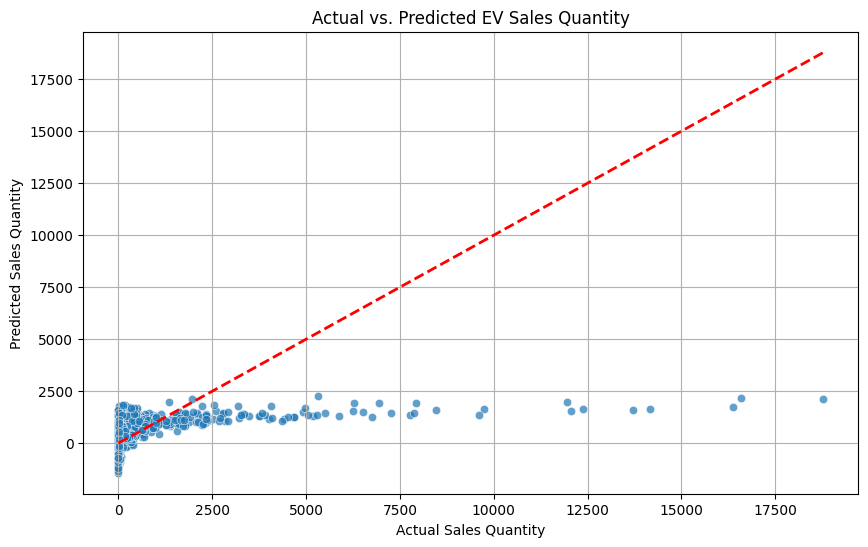

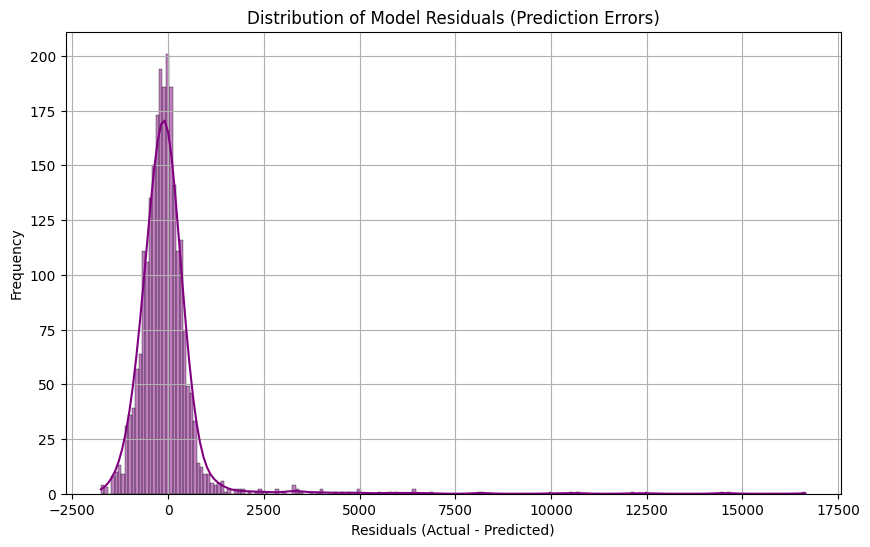


Visualizations of model results completed.


In [32]:
# --- Step 7: Visualization: Visualize the results and trends ---
print("\n--- Step 7: Visualization of Model Results ---")

# Visualization 1: Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Actual vs. Predicted EV Sales Quantity')
plt.xlabel('Actual Sales Quantity')
plt.ylabel('Predicted Sales Quantity')
plt.grid(True)
plt.show()

# Visualization 2: Distribution of Residuals (Errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Model Residuals (Prediction Errors)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("\nVisualizations of model results completed.")